In [19]:
import pandas as pd
from pathlib import Path

from sklearn.preprocessing import MinMaxScaler

import umap

import seaborn as sns

In [3]:
local_path = Path.cwd()

In [38]:
data = pd.read_csv(local_path / 'data' /  'HI_features.dat').drop(['cell_number','sex','BMI','age','insulin_SI'],axis=1)

#strip mM from glucose column
data['glucose'] = data['glucose'].str.strip('mM')
data['glucose'] = data['glucose'].astype(float)

In [39]:
cell_types = data.pop('cell_type')
date = data.pop('date')
islet = data.pop('islet')

In [40]:
columns = list(data.columns)

#scale data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#new dataframe
data = pd.DataFrame(data, columns=columns)
data = data.fillna(0)

In [41]:
for column in data.columns:
    print(column)

glucose
g_barycenter
s_barycenter
g_barycenter_std
s_barycenter_std
cell_area
cell_perimeter
cell_circularity
oxphos_nolipo
oxphos
lipofuscin_area_rel
g_har2_barycenter
s_har2_barycenter
g_har2_barycenter_std
s_har2_barycenter_std
g_min
g_max
g_mean
g_mode
g_std
g_CV
g_25
g_50
g_75
g_99
g_IQR
g_whisker_low
g_whisker_high
g_CI_67_min
g_CI_67_max
g_CI_95_min
g_CI_95_max
g_CI_99_min
g_CI_99_max
s_min
s_max
s_mean
s_mode
s_std
s_CV
s_25
s_50
s_75
s_99
s_IQR
s_whisker_low
s_whisker_high
s_CI_67_min
s_CI_67_max
s_CI_95_min
s_CI_95_max
s_CI_99_min
s_CI_99_max
g_har2min
g_har2max
g_har2mean
g_har2mode
g_har2std
g_har2CV
g_har225
g_har250
g_har275
g_har299
g_har2IQR
g_har2whisker_low
g_har2whisker_high
g_har2CI_67_min
g_har2CI_67_max
g_har2CI_95_min
g_har2CI_95_max
g_har2CI_99_min
g_har2CI_99_max
s_har2min
s_har2max
s_har2mean
s_har2mode
s_har2std
s_har2CV
s_har225
s_har250
s_har275
s_har299
s_har2IQR
s_har2whisker_low
s_har2whisker_high
s_har2CI_67_min
s_har2CI_67_max
s_har2CI_95_min
s_har2CI_

In [42]:
umap_obj = umap.UMAP()
reduced = umap_obj.fit_transform(data)

In [43]:
reduced

array([[10.371961  ,  2.497265  ],
       [10.951949  ,  2.004006  ],
       [ 9.304235  ,  2.9753616 ],
       ...,
       [ 0.07598123,  5.004199  ],
       [ 0.4195456 ,  5.624672  ],
       [ 1.4001546 ,  4.8482456 ]], dtype=float32)

In [44]:
reduced_df = pd.DataFrame(reduced, columns=['UMAP1','UMAP2'])

In [45]:
reduced_df['cell_type'] = cell_types
reduced_df['date'] = date
reduced_df['islet'] = islet

In [46]:
reduced_df

,UMAP1,UMAP2,cell_type,date,islet
0,10.371961,2.497265,beta,20210630,P3H1
1,10.951949,2.004006,beta,20210630,P3H1
2,9.304235,2.975362,beta,20210630,P3H1
3,9.326102,2.136366,beta,20210630,P3H1
4,10.086216,2.927361,beta,20210630,P3H1
...,...,...,...,...,...
1927,1.258151,5.014335,alpha,20210923,P2H3
1928,1.557509,4.705405,alpha,20210923,P2H3
1929,0.075981,5.004199,alpha,20210923,P2H3
1930,0.419546,5.624672,alpha,20210923,P2H3


/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

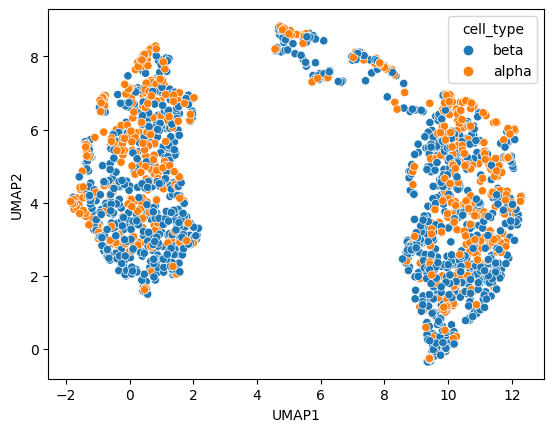

In [47]:
#use seaborn scatter UMAP1 and UMAP2, color by cell type
sns.scatterplot(data=reduced_df, x='UMAP1', y='UMAP2', hue='cell_type', palette='tab10')

/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

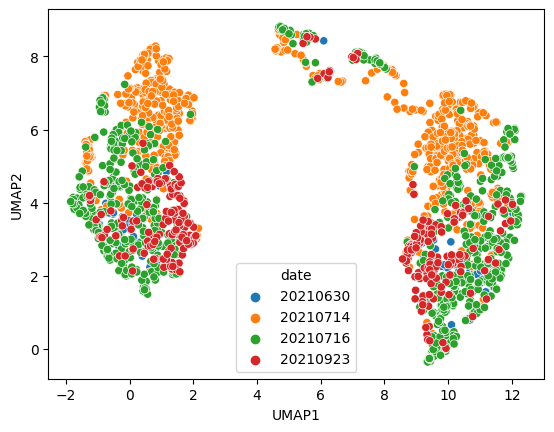

In [48]:
#use seaborn scatter UMAP1 and UMAP2, color by cell type
sns.scatterplot(data=reduced_df, x='UMAP1', y='UMAP2', hue='date', palette='tab10')

/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/fcarli/envs/umap/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

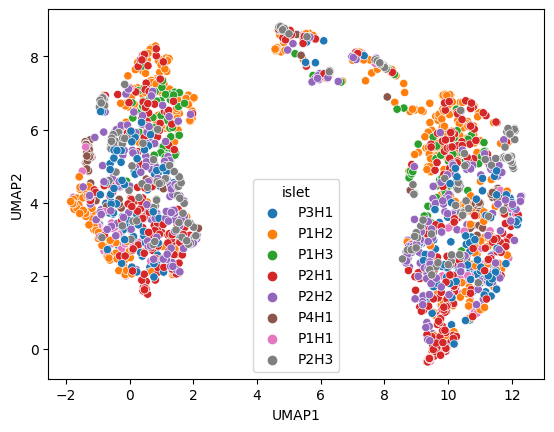

In [49]:
#use seaborn scatter UMAP1 and UMAP2, color by cell type
sns.scatterplot(data=reduced_df, x='UMAP1', y='UMAP2', hue='islet', palette='tab10')